In [75]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
# augment data for better accuracy
from imblearn.over_sampling import SMOTE


In [76]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [77]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [78]:
# sklearn utils to dataframe 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [79]:
# transform to dataframe
df = data['frame']


In [80]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [81]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [83]:
# check for missing values
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

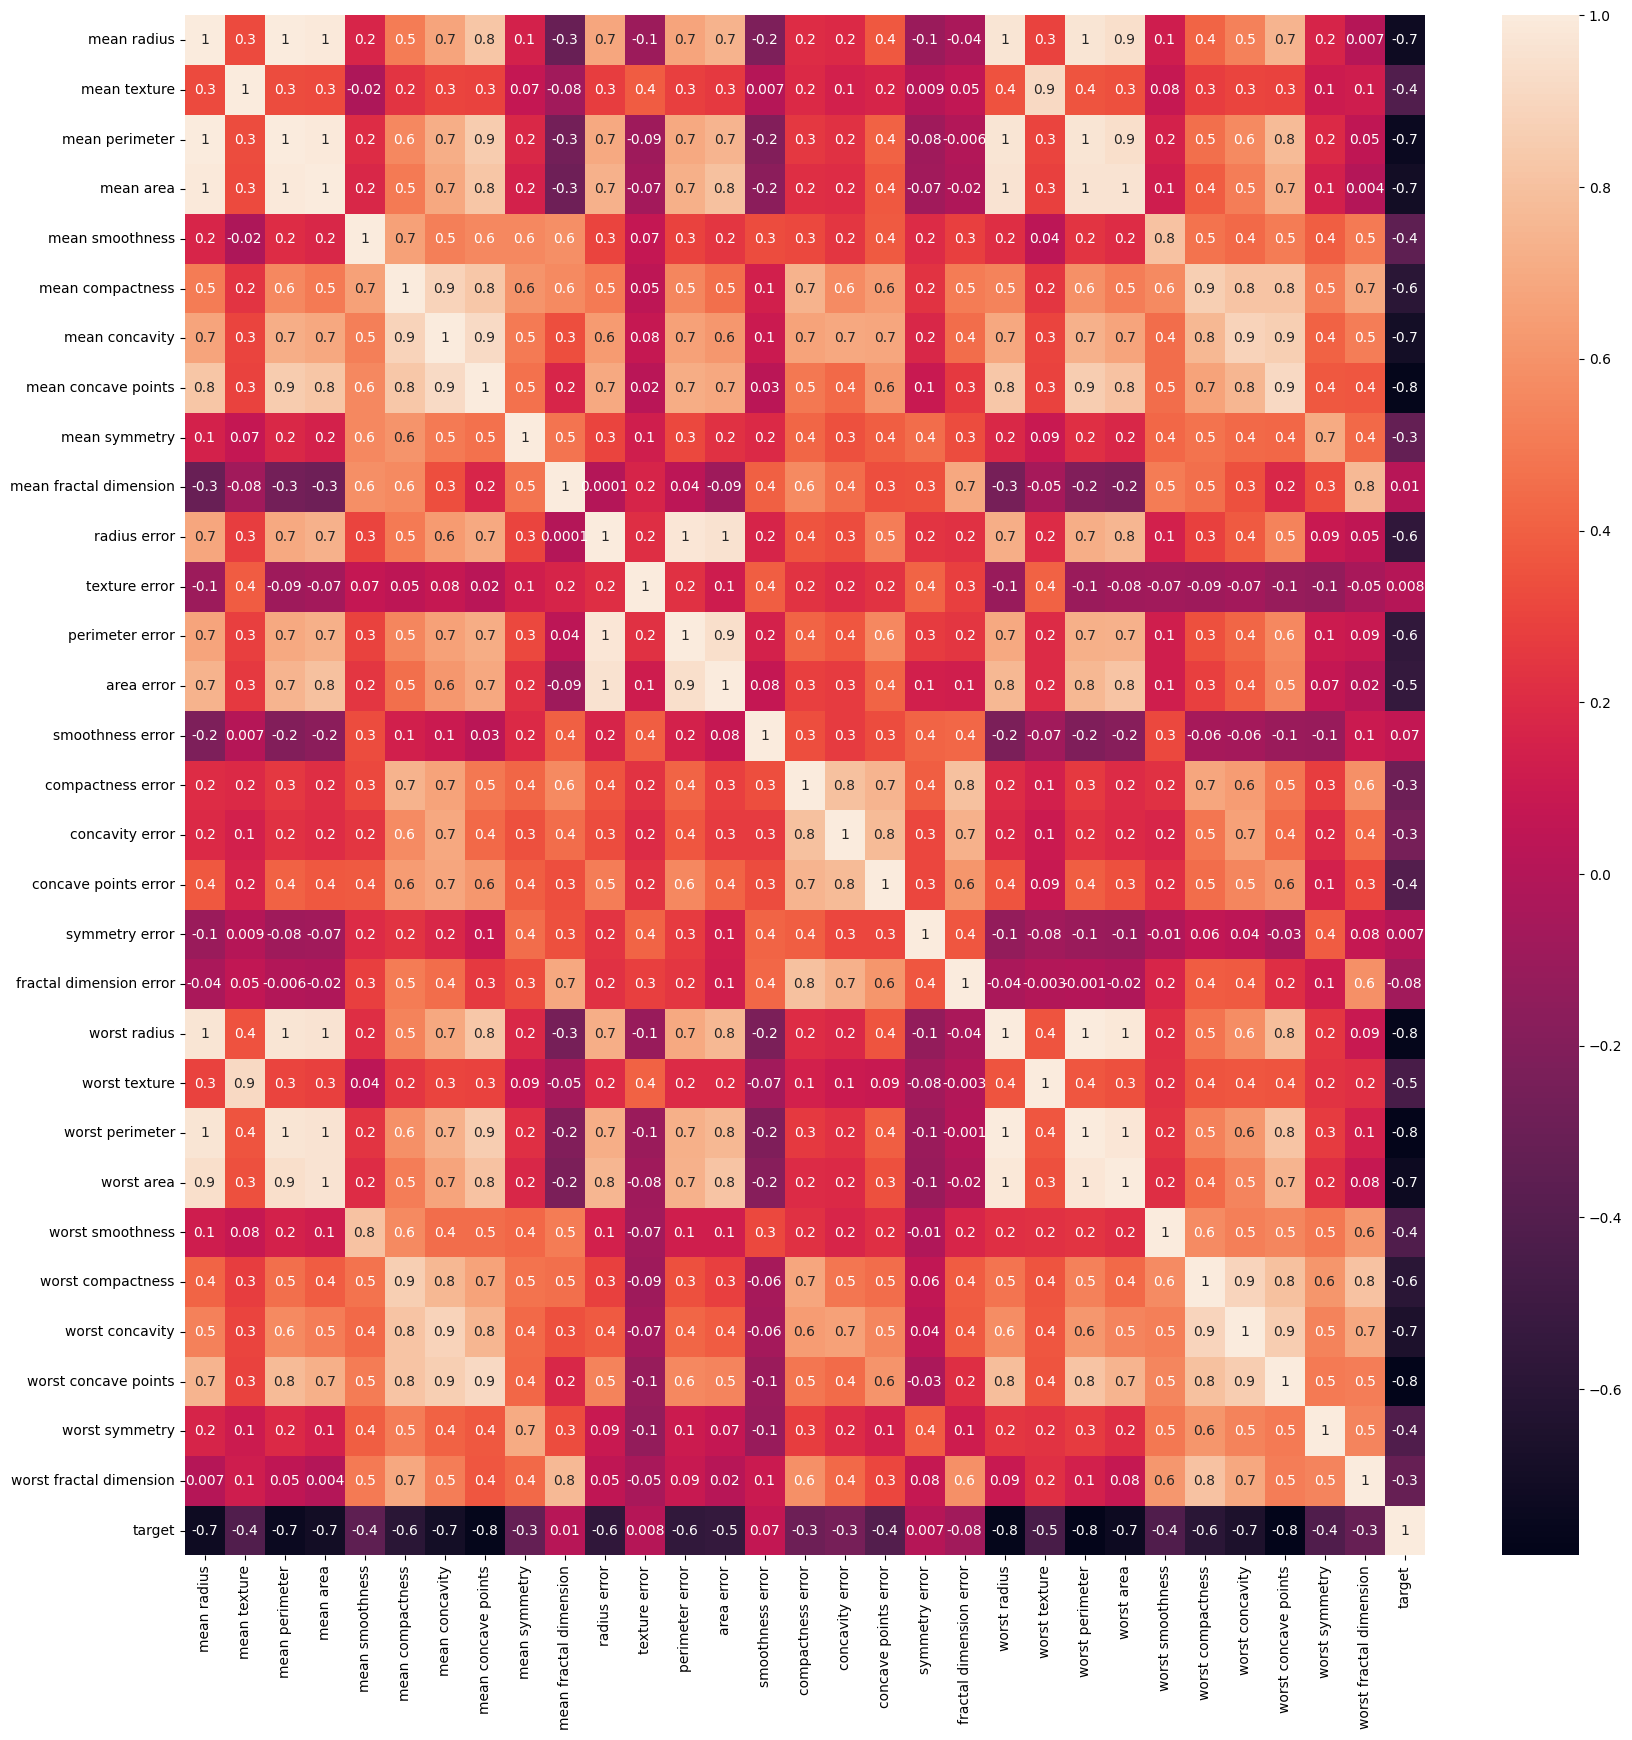

In [84]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.1g')
plt.show()


In [85]:
# show correlation with target
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

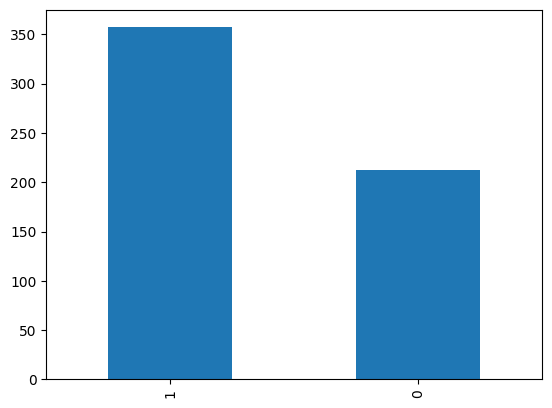

In [86]:
# show positive count and negative count of target as a bar chart
df['target'].value_counts().plot(kind='bar')
plt.show()

In [87]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1, random_state=20)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.98        32

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

[[24  1]
 [ 0 32]]


## Disclaimer: Deep learning
Here the dataset is too small to test deep learning algorithms on. still we provide with an implementation. The DL tast will be using images on a different data at a later point.

In [88]:

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [90]:
# use pytorch to train model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# convert to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test.values)

# create dataset
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

# create dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True)

# create model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 16)
        self.fc2 = nn.Linear(16, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [92]:
# create model
model = Model()


In [93]:
# define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [94]:
# train model
epochs = 100
for i in range(epochs):
    for X_batch, y_batch in train_dl:
        y_pred = model.forward(X_batch)
        loss = loss_function(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {i+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.6874309778213501
Epoch: 2, Loss: 0.6280025839805603
Epoch: 3, Loss: 0.38130444288253784
Epoch: 4, Loss: 0.24149911105632782
Epoch: 5, Loss: 0.15270300209522247
Epoch: 6, Loss: 0.14388178288936615
Epoch: 7, Loss: 0.14250855147838593
Epoch: 8, Loss: 0.2303551882505417
Epoch: 9, Loss: 0.13650420308113098
Epoch: 10, Loss: 0.2517630457878113
Epoch: 11, Loss: 0.08030812442302704
Epoch: 12, Loss: 0.2860841155052185
Epoch: 13, Loss: 0.03646702691912651
Epoch: 14, Loss: 0.05892292782664299
Epoch: 15, Loss: 0.03195999190211296
Epoch: 16, Loss: 0.07736000418663025
Epoch: 17, Loss: 0.14492535591125488
Epoch: 18, Loss: 0.048697881400585175
Epoch: 19, Loss: 0.029935916885733604
Epoch: 20, Loss: 0.019100461155176163
Epoch: 21, Loss: 0.041592665016651154
Epoch: 22, Loss: 0.01096495520323515
Epoch: 23, Loss: 0.12546445429325104
Epoch: 24, Loss: 0.02562306448817253
Epoch: 25, Loss: 0.021281667053699493
Epoch: 26, Loss: 0.09684664011001587
Epoch: 27, Loss: 0.011782522313296795
Epoch: 28

In [95]:
# evaluate
# get predictions
predictions = []
with torch.no_grad():
    for X_batch, y_batch in test_dl:
        y_pred = model.forward(X_batch)
        predictions.append(y_pred.argmax(dim=1))

# flatten list
predictions = [item for sublist in predictions for item in sublist]

# calculate accuracy
accuracy_score(y_test, predictions)


0.5789473684210527

Quantum Machine Learning

In [98]:
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

In [106]:
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp38-cp38-macosx_10_9_x86_64.whl size=101464 sha256=22d2ad92ade4bddbbaabbb775853e7b3ecd19c7c1e50805794636f21005152b3
  Stored in directory: /Users/rayendhahri/Library/Caches/pip/wheels/e9/ac/30/c962f9d759dd68cb5482727c44441fdfb48040fdbe983857e8
Successfully built fastdtw
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [115]:
from qiskit.aqua.algorithms import QSVM
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit import BasicAer

ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/qiskit/providers/__init__.py)

In [114]:

# create feature map
feature_map = ZZFeatureMap(feature_dimension=30, reps=2, entanglement='linear')

# create ansatz
ansatz = RealAmplitudes(num_qubits=30, reps=2)

# create quantum kernel
quantum_kernel = QuantumKernel(feature_map=feature_map,
                                 quantum_instance=Aer.get_backend('statevector_simulator'),
                                    ansatz=ansatz)

# train model
qsvm = QSVM(quantum_kernel)
qsvm.fit(X_train, y_train)

# predict
y_pred = qsvm.predict(X_test)

# evaluate
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/qiskit/providers/__init__.py)